In [2]:
import quantiacsToolbox
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import svm
%matplotlib inline

In [13]:
class myStrategy(object):
    
    day = 0
    stockDict = {}

    def myTradingSystem(self, DATE, OPEN, HIGH, LOW, CLOSE, VOL, OI, P, R, RINFO, exposure, equity, settings):
        nMarkets= CLOSE.shape[1]
        df = pd.DataFrame(CLOSE)
        countStock = 0
        
        for i in df.columns:
            fastperiod = df.loc[:,i].ewm(span=12, adjust=False).mean()
            slowperiod = df.loc[:,i].ewm(span=26, adjust=False).mean()
            macd = fastperiod - slowperiod
            signal = macd.ewm(span=9, adjust=False).mean()
            stockdf = pd.concat([fastperiod,slowperiod,macd,signal], axis = 1)
            stockdf.columns = ['fastperiod','slowperiod','macd','signal']
            self.stockDict[countStock] = stockdf
            countStock += 1
        #print(self.stockDict)

        def intersection(lst_1,lst_2):
            intersections = []
            insights = []
            if len(lst_1) > len(lst_2):
                settle = len(lst_2)
            else:
                settle = len(lst_1)
            for i in range(settle-1):
                if (lst_1[i+1] < lst_2[i+1]) != (lst_1[i] < lst_2[i]):
                    if ((lst_1[i+1] < lst_2[i+1]),(lst_1[i] < lst_2[i])) == (True,False):
                        insights.append('sell')
                    else:
                        insights.append('buy')
                else:
                    insights.append('hold')

            #print(len(insights))
            insights.append("hold") ### ??????????
            
            return insights
        
        for stock in self.stockDict:
            df = self.stockDict[stock] 
            insights = intersection(df['signal'],df['macd'])
            df['insights'] = insights
            self.stockDict[stock] = df
        #print(self.stockDict)
        
        pos = np.zeros(nMarkets)
        index = 0
  
        for i in range(len(pos)):
            #print(self.day)
            if self.day >= 504:
                print('?????')
                break
            #print(self.stockDict[index].insights[self.day])
            if self.stockDict[index].insights[self.day] == 'buy':
                pos[i] = 1
        
            elif self.stockDict[index].insights[self.day] == 'sell':
                pos[i] = -1
                
            
            index += 1
            
        self.day += 1
        #print(pos)
        weights= pos/np.nansum(abs(pos))
        return weights, settings
        
    def mySettings(self):
        """ Define your trading system settings here """

        settings = {}

        # Futures Contracts
        settings['markets'] = ['CASH', 'F_AD', 'F_BO']

        settings['budget'] = 10 ** 6
        settings['slippage'] = 0.05
        settings['lookback'] = 504
        
        settings['beginInSample'] = '20180101'
        settings['endInSample'] = '20201231'

        settings['gap'] = 5

        return settings
        
            

copying data from cache
Evaluating Trading System <class '__main__.myStrategy'>


<ipython-input-13-ca4d475c4e41>:70: RuntimeWarning: invalid value encountered in true_divide
  weights= pos/np.nansum(abs(pos))


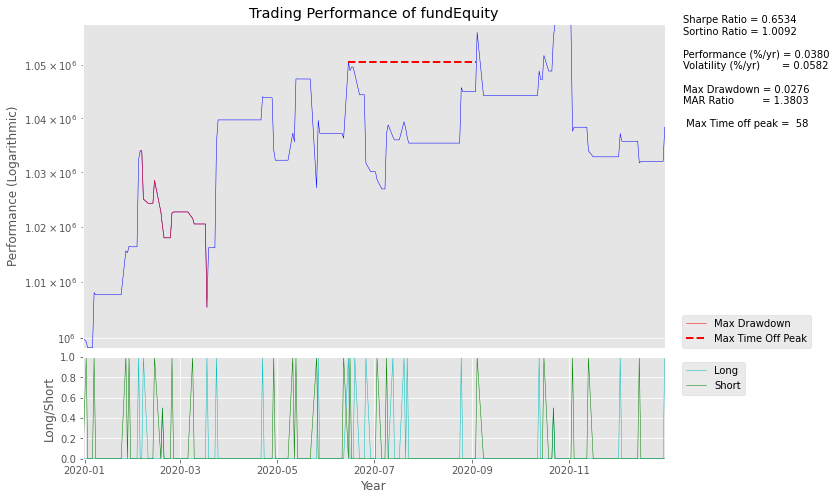

In [14]:
result = quantiacsToolbox.runts(myStrategy)